## Importing Libraries


In [84]:
from glob import glob
import pandas as pd
import numpy as np
from scipy.io import wavfile
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.style.use("fast")

## Importing Data


In [7]:
data_dir = "../../data/"
data_dir_l = glob(data_dir + "*.wav")

In [10]:
sr, data = wavfile.read(data_dir_l[0])

## Manually Detrending the Raw Neural Data Time Series Signal


##### Plotting the time series signal


In [96]:
data_pd = pd.DataFrame(data, columns=["Amplitude"])
data_pd.head()

,Amplitude
0,-352
1,-416
2,-288
3,-288
4,-160


In [97]:
time_index = np.arange(0, (len(data_pd) / sr), step=1 / sr)
data_pd["Time [S]"] = time_index
data_pd = data_pd.set_index("Time [S]")

2.879199804867838e-30


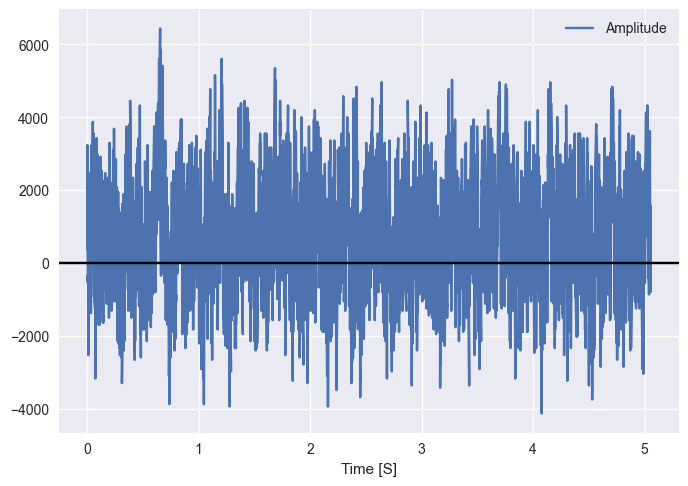

In [134]:
# Testing for stationarity
_, p, _, _, _, _ = adfuller(data_pd["Amplitude"])
print(p)
# The data is stationary with a constant mean and variance.
# The mean does not oscillate about the zero axis.
data_pd.plot()
plt.axhline(y=0, color="black")

In [98]:
data_pd.head()

,Amplitude
Time [S],
0.000000,-352
0.000051,-416
0.000102,-288
0.000154,-288
0.000205,-160


In [104]:
amplitude_t = np.arange(len(data_pd["Amplitude"]))

In [105]:
# Fitting an OLS linear model to the data and detrending using this method.
amplitude_model = sm.OLS(data_pd["Amplitude"], sm.add_constant(amplitude_t)).fit()

In [107]:
amplitude_trend = amplitude_model.predict(sm.add_constant(amplitude_t))

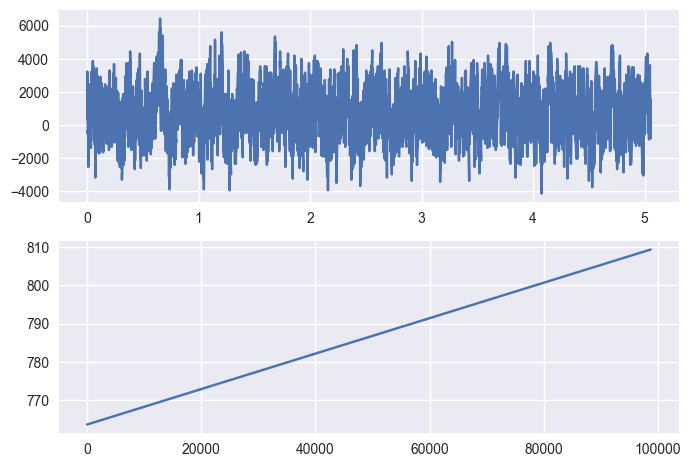

In [113]:
fig, ax = plt.subplots(ncols=1, nrows=2)
ax[0].plot(data_pd["Amplitude"])
ax[1].plot(amplitude_trend)

In [119]:
len(amplitude_trend)

98699

In [123]:
amplitude_detrended = data_pd["Amplitude"] - amplitude_trend

In [126]:
data_pd["Amplitude"]

Time [S]
0.000000   -352
0.000051   -416
0.000102   -288
0.000154   -288
0.000205   -160
           ... 
5.053197   -288
5.053249   -352
5.053300    287
5.053351    223
5.053402   -288
Name: Amplitude, Length: 98699, dtype: int16

In [127]:
amplitude_trend

array([763.64615623, 763.64661924, 763.64708226, ..., 809.34384977,
       809.34431278, 809.3447758 ])

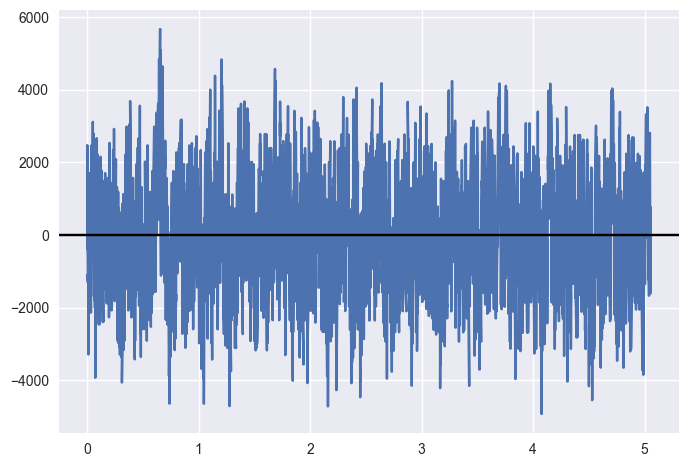

In [131]:
plt.plot(amplitude_detrended)
plt.axhline(y=0, color="black")

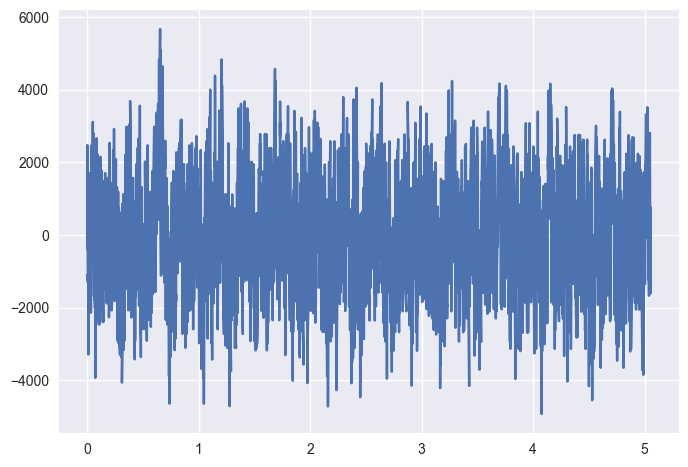

In [133]:
plt.plot(amplitude_detrended)

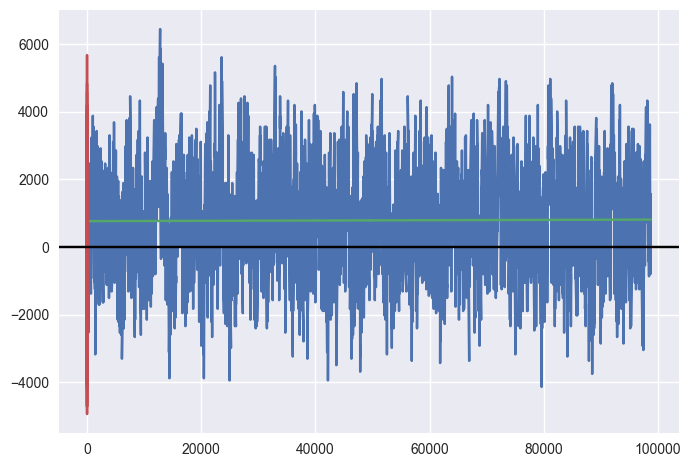

In [124]:
plt.plot(np.arange(len(data_pd["Amplitude"])), data_pd["Amplitude"])
plt.plot(amplitude_trend)
plt.axhline(y=0, color="black")
plt.show()

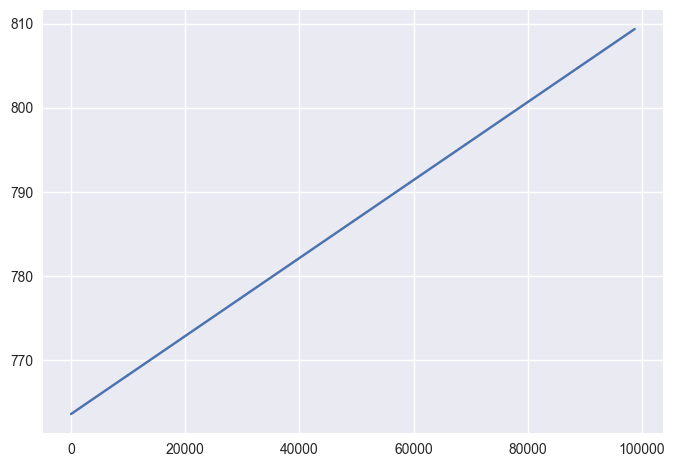

In [109]:
plt.plot(amplitude_trend)

## Transform the Raw Neural Signal into a matrix form
